#   **Pattern recognition course | ECE AUTH | 3nd project | Winter semester 2022**

# **Floriculture Laboratory of the Department of Agriculture**

![ logo](iris.png)



>   Giachoudis Christos


>   Kostopoulos Andreas Marios

# **General comments**



# Necessary imports

In [6]:
# Importing the necessary libraries and modules
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn as skl
import pandas as pd

# **Useful functions for plotting**

In [2]:
# ***Function for plotting into subplots at the same figure***
#_____________________________________________________________
# fig: the figure in which will be done the plotting
# figx: number of subplot placeholders on the x axis
# figy: number of subplot placeholders on the y axis
# fig_no: the place where the plot will be putted
# title: the title of the plot
# x_label: the label for the x axis of the plot
# y_label: the label for the y axis of the plot
# x: values for the x axis
# y: values for the y axis
#_____________________________________________________________
def vizualize(fig, figx, figy, fig_no, title, x_label, y_label, x, y, custom_color="blue"):
    ax = fig.add_subplot(figy, figx, fig_no)
    ax.set_facecolor('black')
    ax.grid(color='white', linestyle="--", alpha=0.3)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x, y, color=custom_color)
    plt.legend([f"{title}"], loc = "upper right")

# **Part A**

## **Iris plants dataset**

In [3]:
# import dataset
from sklearn.datasets import load_iris
dataset = load_iris(as_frame=True)

# show dataset summary statistics
dataset['data'].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# show dataset statistics
dataset['data'].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# show how many values we have in each class
dataset['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [35]:
# Convert dataset to pandas dataframe
iris_set = pd.DataFrame(dataset.data, columns=dataset.feature_names)
iris_set['target'] = dataset.target
# print(iris_set.tail(10)) # just checking

# enrich the dataframe with names
species = []
for i in range(len(iris_set['target'])):
    if iris_set['target'][i] == 0:
        species.append("setosa")
    elif iris_set['target'][i] == 1:
        species.append('versicolor')
    else:
        species.append('virginica')
iris_set['species'] = species
# print(iris_set.tail(10)) # just checking

# discard what I don't need
iris_set.drop(iris_set.columns[[2,3]], axis=1, inplace=True)
print(iris_set.head(10)) # just checking

     sepal length (cm)  sepal width (cm)  target    species
140                6.7               3.1       2  virginica
141                6.9               3.1       2  virginica
142                5.8               2.7       2  virginica
143                6.8               3.2       2  virginica
144                6.7               3.3       2  virginica
145                6.7               3.0       2  virginica
146                6.3               2.5       2  virginica
147                6.5               3.0       2  virginica
148                6.2               3.4       2  virginica
149                5.9               3.0       2  virginica


<AxesSubplot: >

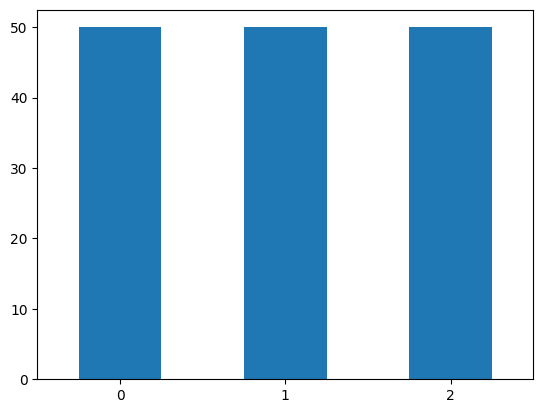

In [36]:
# data quantity vizualization
iris_set.target.value_counts().plot(kind='bar', rot=0)

In [37]:
# destructuring
x = iris_set['data']
y = iris_set['target']

# show the dataset
print(x)
print(y)

KeyError: 'data'

In [21]:
# training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True, random_state=42)

print("The X_train set is:")
print(X_train)

print("The X_test set is:")
print(X_test)

print("The y_train set is:")
print(y_train)

print("The y_test set is:")
print(y_test)

The X_train set is:
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
84                 5.4               3.0                4.5               1.5
148                6.2               3.4                5.4               2.3
53                 5.5               2.3                4.0               1.3
5                  5.4               3.9                1.7               0.4
93                 5.0               2.3                3.3               1.0
..                 ...               ...                ...               ...
71                 6.1               2.8                4.0               1.3
106                4.9               2.5                4.5               1.7
14                 5.8               4.0                1.2               0.2
92                 5.8               2.6                4.0               1.2
102                7.1               3.0                5.9               2.1

[75 rows x 4 columns]
The X_test set is:
  